#  Clustering

## K-means

We are going to use some synthetic datasets to understand various aspects of Lloyd's algorithm for the k-means  clustering problem.

In [23]:
#use the following numero di matricola
numero_di_matricola = 1

In [18]:
#import all packages needed
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.datasets import make_blobs, make_circles

We start by generating a simple dataset using the $\texttt{make\_blobs}$ function.

Text(0.5, 1.0, 'Input data')

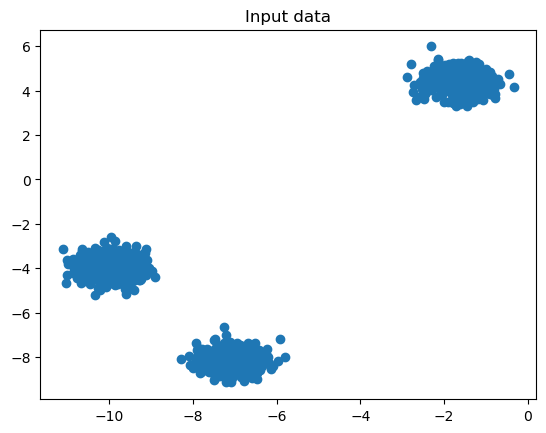

In [19]:
n_samples = 1500

X, y = make_blobs(n_samples=n_samples, cluster_std=[0.4, 0.4, 0.4], random_state = 1)
plt.scatter(X[:, 0], X[:, 1])
plt.title("Input data")

What do you expect a reasonable clustering algorithm to provide as clustering? 

Let's check if this is what we obtain with the $\texttt{KMeans}$ package.

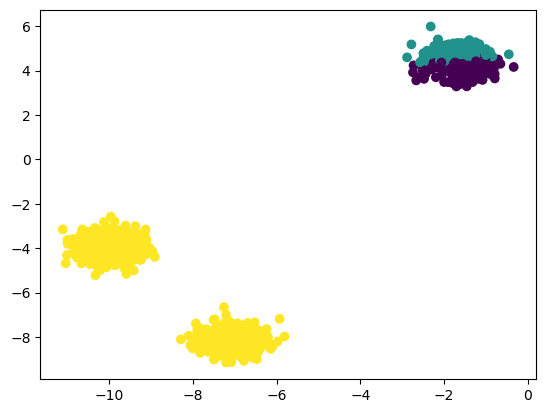

In [32]:
y_pred = KMeans(n_clusters=3, init="random", n_init=1, random_state=6).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
# Try to print the centers.

What is going on here?
The random position of the center can mess up the things!

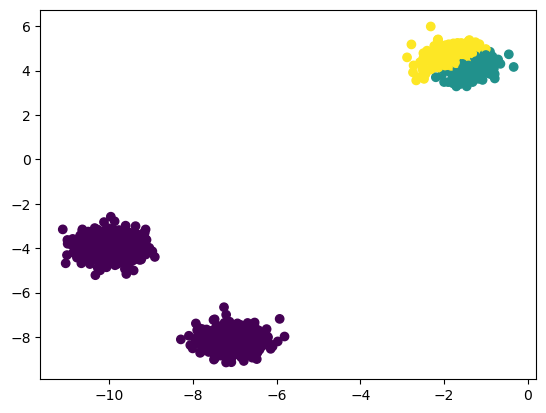

In [13]:
# Define the coordinates of the centers.
y_pred = KMeans(n_clusters=3, init=np.array([[-9, -2], [0, 3], [-2, 6]]), n_init=1, random_state=1).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
# We have a bad outcome.

Ok, maybe we now understand what is going on. How can we check if this is really the case?
We try more than one times with random initn.

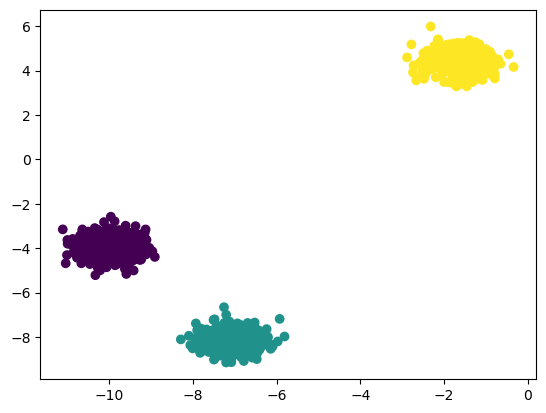

In [15]:
y_pred = KMeans(n_clusters=3, init="random", n_init=9, random_state=1).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)

How can we solve this issue? Yes! Running algorithm with random init, many times.

What is the parameter in $\texttt{KMeans}$ to do this? Use 'init' param.

Let's try and see what happens.

What about being able to choose the centers that are kind of far away from each other? This is what is achieved by the $\texttt{k-means++}$ initialization algorithm.

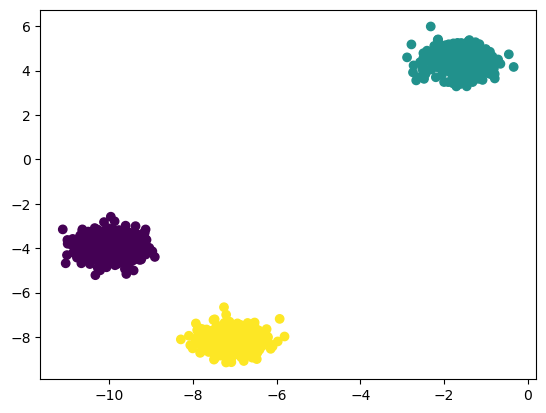

In [35]:
# Init the centers by means of the k-means++ algorith!!
y_pred = KMeans(n_clusters=3, init="k-means++", n_init=6, random_state=1).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)

## Choice of the number k of clusters

Lloyd's algorithm assumes that the number $k$ of desired clusters is passed as input. In some applications it makes sense, but in others we do not know $k$. How can decide the value of $k$?

Let's see how the value of the objective function changes when using $k \in \{2, 3, 4, 5\}$. For each value of $k$, we also _print the value of the objective function_ (have a look at the documentation of scikit-learn).

In [55]:
clustering_k2 = KMeans(n_clusters=2, init="k-means++", n_init=6, random_state=1).fit(X)
clustering_k3 = KMeans(n_clusters=3, init="k-means++", n_init=6, random_state=1).fit(X)
clustering_k4 = KMeans(n_clusters=4, init="k-means++", n_init=6, random_state=1).fit(X)
clustering_k5 = KMeans(n_clusters=5, init="k-means++", n_init=6, random_state=1).fit(X)

print("Cost with 2 cluster are", clustering_k2.inertia_)
print("Cost with 3 cluster are", clustering_k3.inertia_)
print("Cost with 4 cluster are", clustering_k4.inertia_)
print("Cost with 5 cluster are", clustering_k5.inertia_)
# The more the centers are, the less is the the objective function!!

Cost with 2 cluster are 7035.504153300217
Cost with 3 cluster are 474.29971247335914
Cost with 4 cluster are 417.20600254621536
Cost with 5 cluster are 367.6492823626953


Is the clustering with the smallest value of the cost the best one? Let's visualize it.

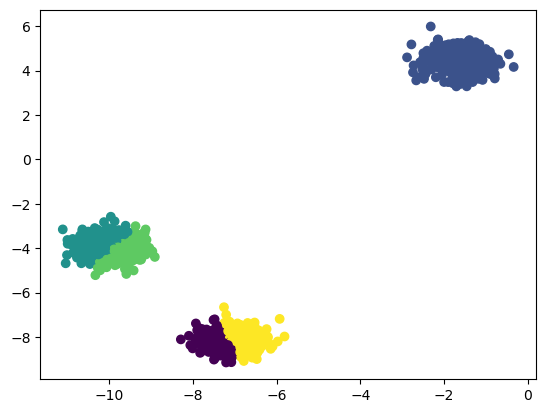

In [56]:
y_pred = clustering_k5.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)

Why does this happen?
The more the centers are, the less is the the objective function!!
Edge case: use exactly $m$ centers! (Objcetive function has cost 0).

Let's use a different approach: the silhouette coefficient. For each of the clusterings obtained above (with $k \in \{2,3,4,5\}$), compute its average silhouette score (again, see the documentation of scikit-learn for more details).

In [ ]:
from sklearn.metrics import silhouette_score

# -- TO COMPLETE

Let's test this approach to a new dataset, similar to the previous one, but with a bit more noise.  

In [ ]:
n_samples = 1500

X, y = make_blobs(n_samples=n_samples, cluster_std=[0.9, 0.9, 0.9], random_state = 1)
plt.scatter(X[:, 0], X[:, 1])
plt.title("Input data")

Let's compute the values of the silhouette score for different values of $k \in \{2,3,4,5\}$ as before. Remember to perform again the clustering for the new data!

In [ ]:
# -- TO COMPLETE

According to the silhouette score, which is the best value for $k$? Let's also have a look at the objective function.

In [ ]:
# -- TO COMPLETE

By looking both at the value of the objective function and at the silhouette score, which is the best value for $k$? Why?

Let's plot the (normalized) objective function and the silhouette score to better understand what happens.

In [ ]:
# -- Copy-paste the code from the Plot function (silohuette & obj. fun) section here

## Limitation of $k$-means

The results look good on a simple dataset, but what about a more complicated one? Let's generate a dataset using $\texttt{make\_circles}$.

In [ ]:
X, y = make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
plt.scatter(X[:, 0], X[:, 1])
plt.title("Input data")

Let's run Lloyd's algorithm with random initialization.

In [ ]:
y_pred = # -- TO COMPLETE
plt.scatter(X[:, 0], X[:, 1], c=y_pred)

What about with $\texttt{k-means++}$?

In [ ]:
y_pred = # -- TO COMPLETE
plt.scatter(X[:, 0], X[:, 1], c=y_pred)

Let's try with a different clustering technique: _agglomerative_ clustering!

In [ ]:
y_pred = # -- TO COMPLETE
plt.scatter(X[:, 0], X[:, 1], c=y_pred)

What about the simple dataset we used at the beginning? Let's generate the dataset.

In [ ]:
X, y = make_blobs(n_samples=n_samples, cluster_std=[0.4, 0.4, 0.4], random_state=1)
plt.scatter(X[:, 0], X[:, 1])
plt.title("Input data")

Let use hierarchical clustering with the _single_ linkage options.

In [ ]:
y_pred = # -- TO COMPLETE
plt.scatter(X[:, 0], X[:, 1], c=y_pred)

Let's try a more complex dataset, but still with some easy-to-detect cluster structure.

In [ ]:
X, y = make_blobs(n_samples=n_samples, cluster_std=[0.5, 1.5, 0.7], random_state=numero_di_matricola)
plt.scatter(X[:, 0], X[:, 1])

What do we expect as a reasonable clustering?

Let's try with Lloyd's algorithm, and also with k-means++ initialization.

In [ ]:
y_pred = # -- TO COMPLETE
plt.scatter(X[:, 0], X[:, 1], c=y_pred)

In [ ]:
y_pred = # -- TO COMPLETE
plt.scatter(X[:, 0], X[:, 1], c=y_pred)

What about hierarchical clustering?

In [ ]:
y_pred = # -- TO COMPLETE
plt.scatter(X[:, 0], X[:, 1], c=y_pred)

Moral of the story: no ultimate clustering technique!

### Plot function (silhouette & obj. fun.)

In [57]:
n_clusters = range(2, 11)
silhouettes = []
obj_fun_scores = []

for k in n_clusters:
    clustering = KMeans(n_clusters=k, 
                        init='k-means++',
                        n_init=1, 
                        random_state=numero_di_matricola).fit(X)
    silhouette = silhouette_score(X, clustering.predict(X))
    silhouettes.append(silhouette)
    obj_fun_scores.append(clustering.inertia_)
    print(f"Clustering with k={k}: Cost={clustering.inertia_:.2f}, Silhouette={silhouette:.2f}")

obj_fun_scores = np.array(obj_fun_scores)
obj_fun_scores = obj_fun_scores / max(obj_fun_scores)

plt.plot(n_clusters, silhouettes, label='Silhouette')
plt.plot(n_clusters, obj_fun_scores, label='Norm. Cost')
plt.title(r'Scores vs $k$')
plt.xlabel(r'$k$')
plt.ylabel('Score')
plt.legend();

NameError: name 'silhouette_score' is not defined

### Since is the last lab ...

In [48]:
import random
import time

def christmas_tree():
    tree_height = 16

    print("\n\n🎄 Merry Christmas! 🎄\n".center(40))

    for i in range(tree_height):
        
        spaces = " " * (tree_height - i - 1)

        if i == 0:
            layer_content = "⭐"
        else:
            contents = [ "🍃", "🟡", "🔴", "🔵"]
            content = random.choices(contents, weights = [0.7, 0.1, 0.1, 0.1], k = 2 * i + 1)
            delimiter = ""
            layer_content = delimiter.join(content)

        print((spaces + layer_content).center(40))

    trunk = " " * (tree_height - 1) + "🟫"
    print(trunk.center(40))

christmas_tree()

        

🎄 Merry Christmas! 🎄
         
                           ⭐            
                         🍃🍃🔵            
                        🍃🍃🍃🔴🍃           
                      🔵🔵🍃🔵🍃🔴🔵           
                     🍃🍃🟡🔵🍃🍃🍃🟡🍃          
                   🍃🍃🍃🍃🟡🟡🍃🟡🔴🍃🟡          
                  🔴🔴🍃🍃🍃🍃🔴🍃🍃🍃🔴🍃🍃         
                🍃🍃🔵🍃🍃🍃🍃🍃🍃🍃🍃🍃🍃🍃🍃         
               🍃🍃🔴🔵🔴🍃🍃🍃🍃🔴🔴🍃🍃🍃🍃🍃🍃        
             🍃🔴🍃🟡🍃🟡🍃🔵🍃🍃🍃🍃🍃🔵🔴🔴🍃🍃🔵        
            🍃🔴🍃🍃🍃🍃🍃🔵🔵🍃🍃🍃🍃🔵🍃🔴🍃🍃🍃🍃🔴       
          🍃🔵🍃🍃🍃🍃🔵🍃🔵🔵🍃🔵🔴🔴🍃🔵🍃🍃🍃🍃🍃🍃🍃       
         🔴🍃🍃🔴🍃🍃🍃🍃🍃🍃🍃🍃🍃🍃🟡🍃🍃🟡🍃🍃🍃🍃🍃🍃🍃      
       🍃🟡🍃🍃🔵🍃🍃🍃🍃🍃🟡🔴🍃🍃🍃🍃🔴🟡🟡🍃🟡🔴🍃🍃🍃🍃🟡      
      🍃🍃🍃🍃🟡🍃🍃🍃🔵🍃🍃🍃🍃🍃🍃🍃🍃🔴🍃🍃🍃🔵🍃🔵🍃🔴🍃🍃🍃     
    🔴🔵🔴🔵🔴🟡🍃🍃🔵🍃🍃🍃🍃🍃🟡🍃🍃🍃🟡🔴🔵🔴🔴🍃🍃🔵🍃🍃🍃🔵🍃     
                           🟫            
